Jerry Brown Analyzed
----------------------

In [16]:
from __future__ import print_function

In [28]:
import librosa
import librosa.display
import IPython
import numpy as np
import wave
from pydub import AudioSegment
import warnings; warnings.simplefilter('ignore')
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [18]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [31]:
#macbook prop chrome
wavefile = "./Colorado_Audio_01_25_2018_10_24_25.wav"
w = wave.open(wavefile, 'rb')
y, sr = librosa.load(wavefile)
print("**sample rate from librosa:**",sr)
fr = w.getframerate()
print("framerate  from wave:",fr)
song = AudioSegment.from_wav(wavefile)
sfr = song.frame_rate
print("framerate  from AudioSegment:",sfr)


**sample rate from librosa:** 22050
framerate  from wave: 16000
framerate  from AudioSegment: 16000


In [20]:
IPython.display.Audio(filename=wavefile,rate=sfr)

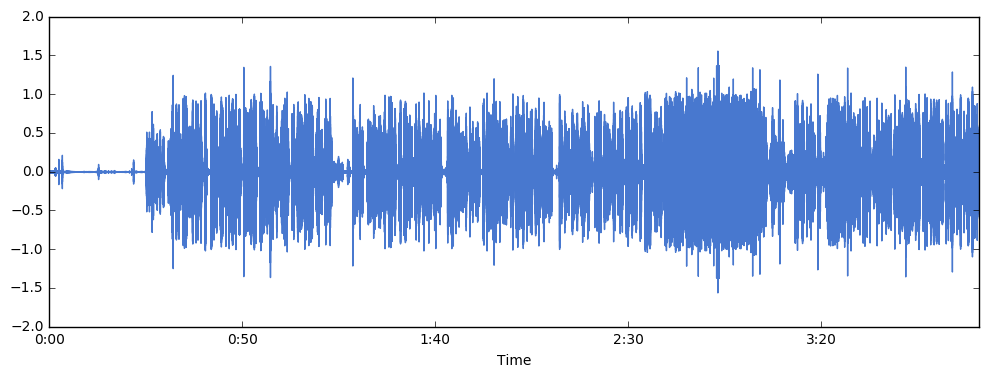

In [21]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr=sr)

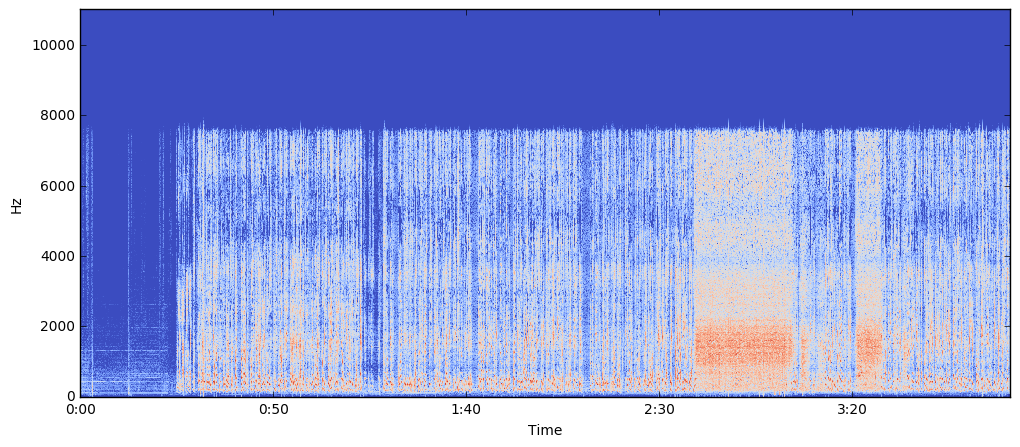

In [22]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [23]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)

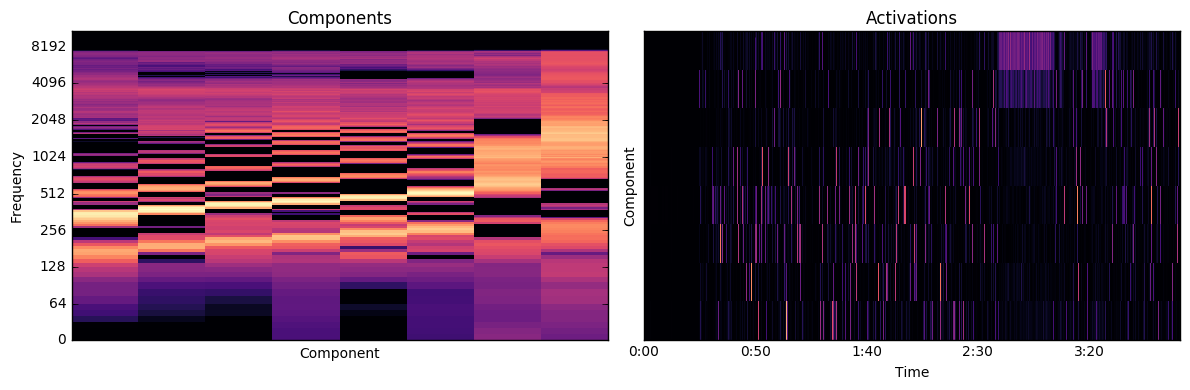

In [24]:
# Visualize the components and activations, just for fun



plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(components, ref=np.max), y_axis='log')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()